<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/Clustering_S2D5_Atividade_Hands_On_(An%C3%A1lise_de_Agrupamentos)_PEDRO_PAULO_CACIOLI_DA_SILVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [ ]:
# seu código
import pandas as pd
df = pd.read_csv("customer_supermarket.xlsx - customer_supermarket.csv")

In [ ]:
# seu código
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,5,0,0,0,0,0,0,3,11,0


### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [ ]:
# seu código
df.shape

(2240, 30)

In [ ]:
# seu código
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Days_Registered      2240 non-null   int64  
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# seu código
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Days_Registered         0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# seu código
df = df.dropna()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# seu código
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Days_Registered', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [ ]:
# seu código
df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds'] + df['MntFishProducts']

<ipython-input-8-d0f7dd38b139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds'] + df['MntFishProducts']


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,0,0,0,3,11,0,27
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,0,0,0,3,11,0,776
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,0,0,0,3,11,0,53
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,0,0,0,3,11,0,422


### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [ ]:
# seu código
dfanalise = df[["Recency", "Days_Registered", "MntTotal", "Income"]]

### Atividade 5: Padronize os dados.

In [ ]:
# seu código
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = dfanalise.copy()

In [ ]:
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
df_scaled.head()

,Recency,Days_Registered,MntTotal,Income
0,0.310532,1.529129,1.675488,0.234063
1,-0.380509,-1.188411,-0.962358,-0.234559
2,-0.795134,-0.205155,0.280250,0.769478
3,-0.795134,-1.059945,-0.919224,-1.017239
4,1.554407,-0.951244,-0.307044,0.240221


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [ ]:
# seu código
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# seu código
distancias = linkage(df_scaled, method="ward", metric="euclidean")
distancias

array([[5.05000000e+02, 1.07900000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.00000000e+00, 3.95000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.40000000e+01, 1.55300000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.42400000e+03, 4.42700000e+03, 3.88349436e+01, 9.99000000e+02],
       [4.42500000e+03, 4.42600000e+03, 4.26341454e+01, 1.21700000e+03],
       [4.42800000e+03, 4.42900000e+03, 7.16339920e+01, 2.21600000e+03]])

In [ ]:
import seaborn as sns

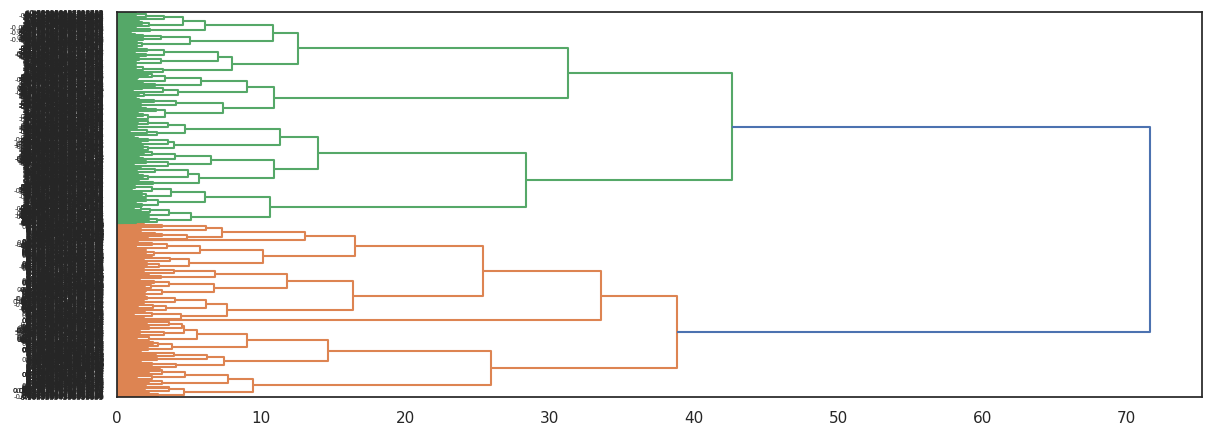

In [ ]:
sns.set(style="white", rc={"figure.figsize":(14,5)})
dn = dendrogram(distancias,
                orientation="right",
                labels=df_scaled["Income"].values)

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [ ]:
# seu código
from scipy.cluster.hierarchy import fcluster

max_d = 4
grupos = fcluster(distancias, t= max_d, criterion="maxclust")
grupos


array([1, 4, 2, ..., 2, 2, 4], dtype=int32)

In [ ]:
df["grupos"] = grupos.tolist()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,grupos
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,0,0,3,11,1,1617,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,0,0,3,11,0,27,4
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,0,0,3,11,0,776,2
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,0,0,3,11,0,53,4
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,0,0,3,11,0,422,3


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

<Axes: xlabel='grupos', ylabel='Recency'>

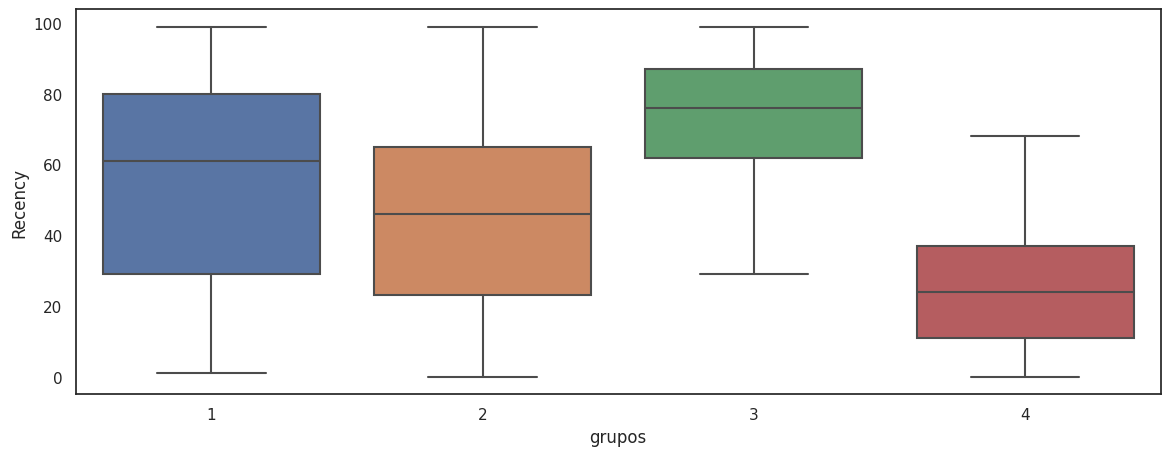

In [ ]:
# seu código
sns.boxplot(data=df, x="grupos", y="Recency")

<Axes: xlabel='grupos', ylabel='Days_Registered'>

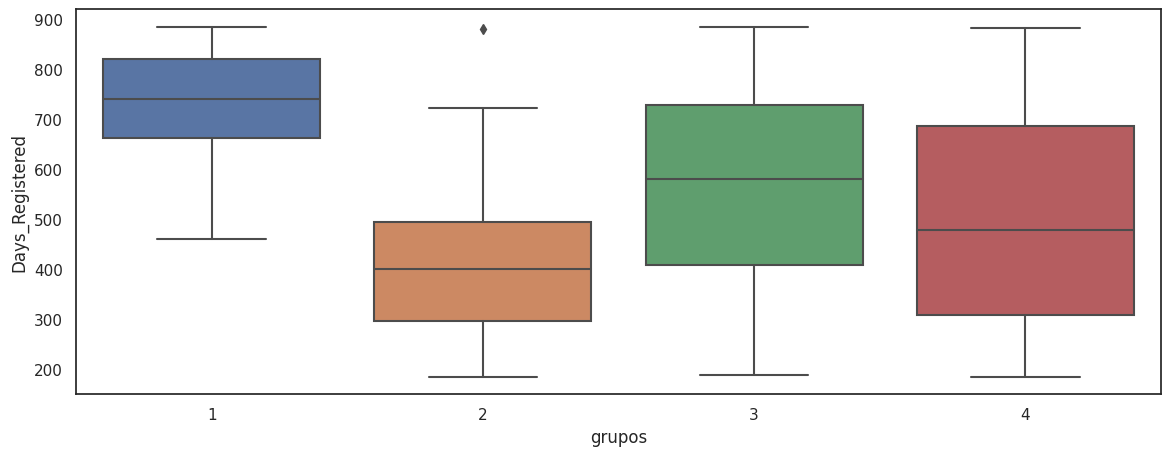

In [ ]:
# seu código
sns.boxplot(data=df, x="grupos", y="Days_Registered")

<Axes: xlabel='grupos', ylabel='MntTotal'>

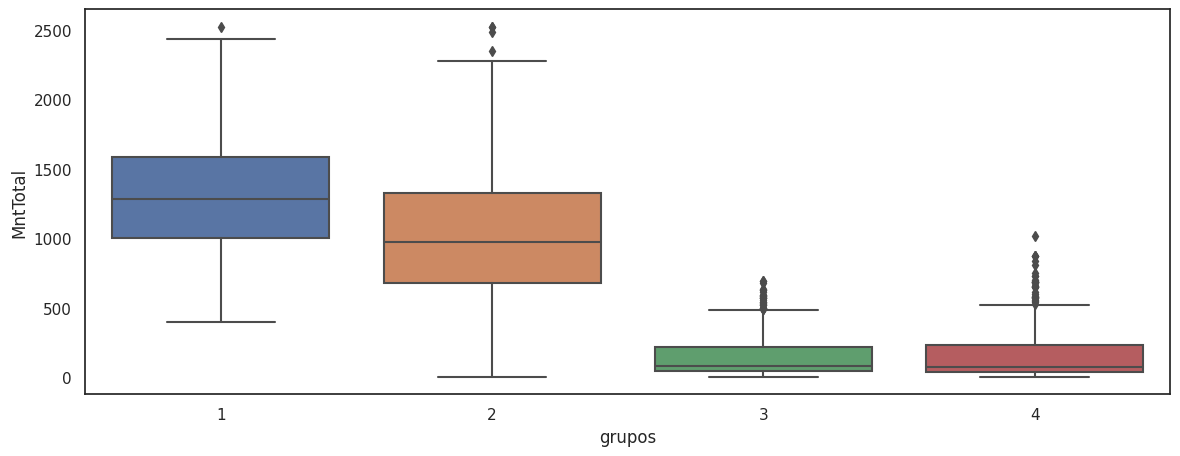

In [ ]:
# seu código
sns.boxplot(data=df, x="grupos", y="MntTotal")

<Axes: xlabel='grupos', ylabel='Income'>

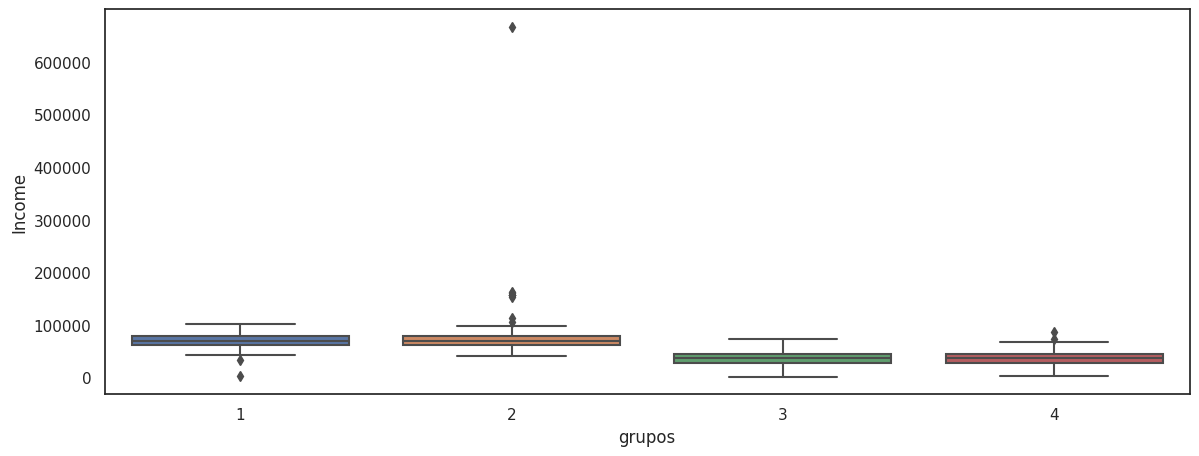

In [ ]:
# seu código
sns.boxplot(data=df, x="grupos", y="Income")

In [ ]:
filtro = df[df["Income"]<600000]
filtro.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,grupos
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,0,0,3,11,1,1617,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,0,0,3,11,0,27,4
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,0,0,3,11,0,776,2
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,0,0,3,11,0,53,4
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,0,0,3,11,0,422,3


<Axes: xlabel='grupos', ylabel='Income'>

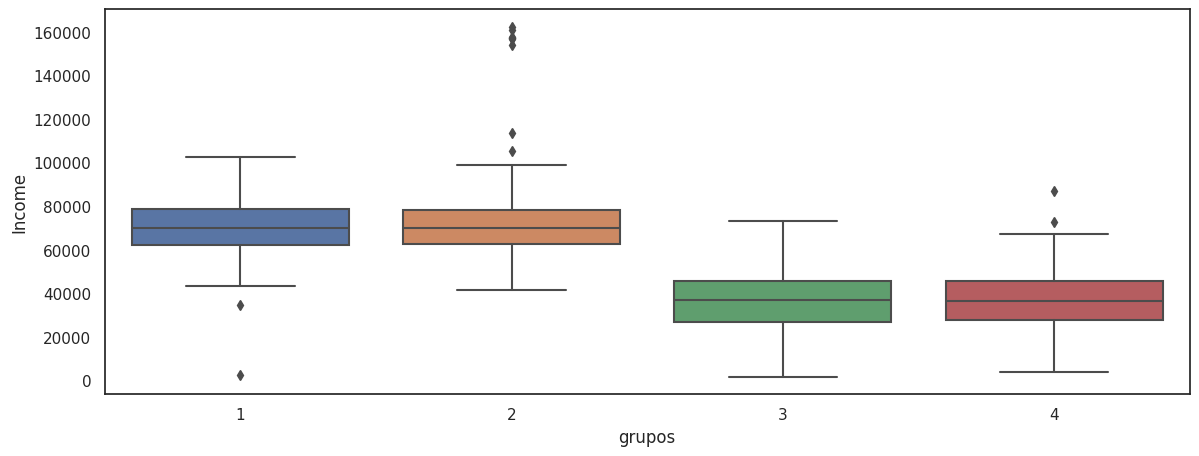

In [ ]:
sns.boxplot(data=filtro, x="grupos", y="Income")

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

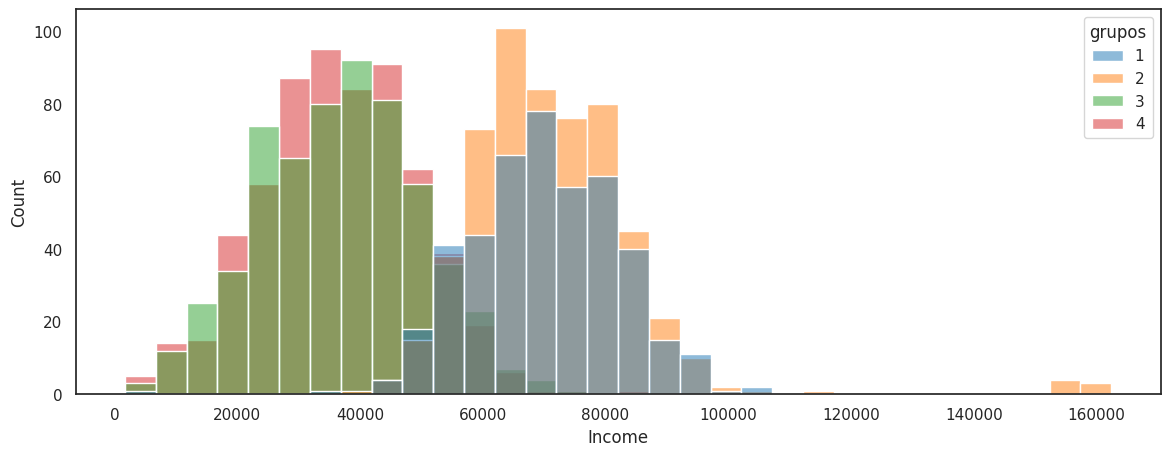

In [ ]:
# seu código
sns.histplot(data=filtro, x="Income", hue="grupos", palette="tab10");

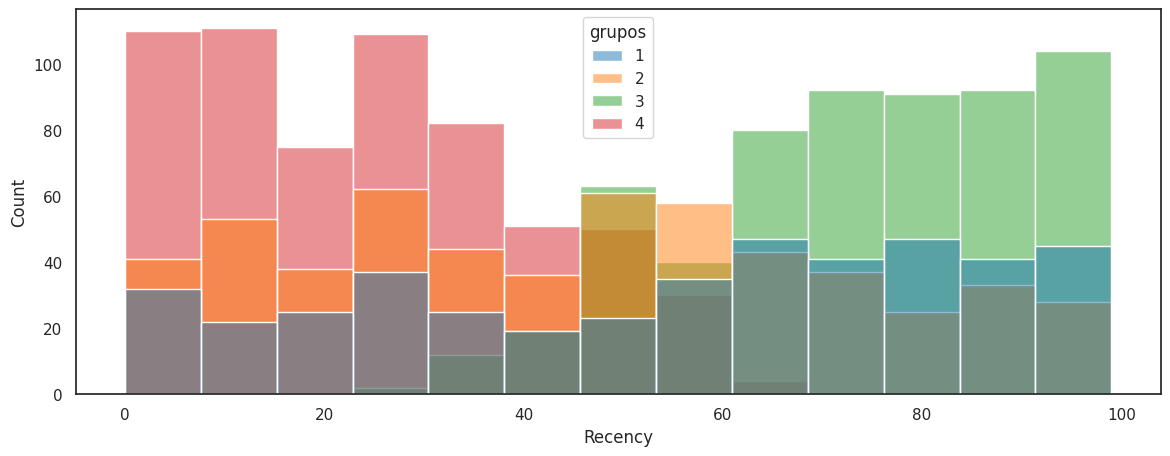

In [ ]:
# seu código
sns.histplot(data=filtro, x="Recency", hue="grupos", palette="tab10");

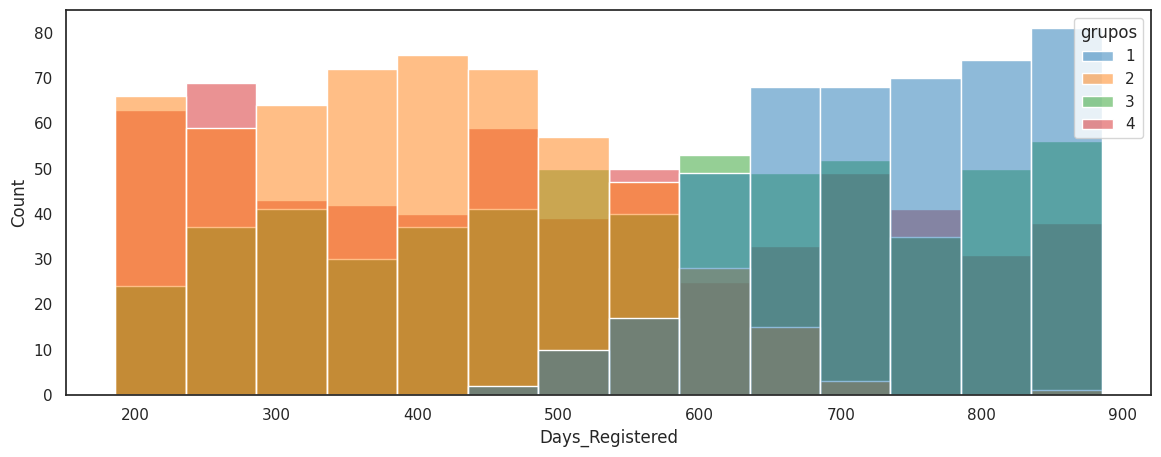

In [ ]:
# seu código
sns.histplot(data=filtro, x="Days_Registered", hue="grupos", palette="tab10");

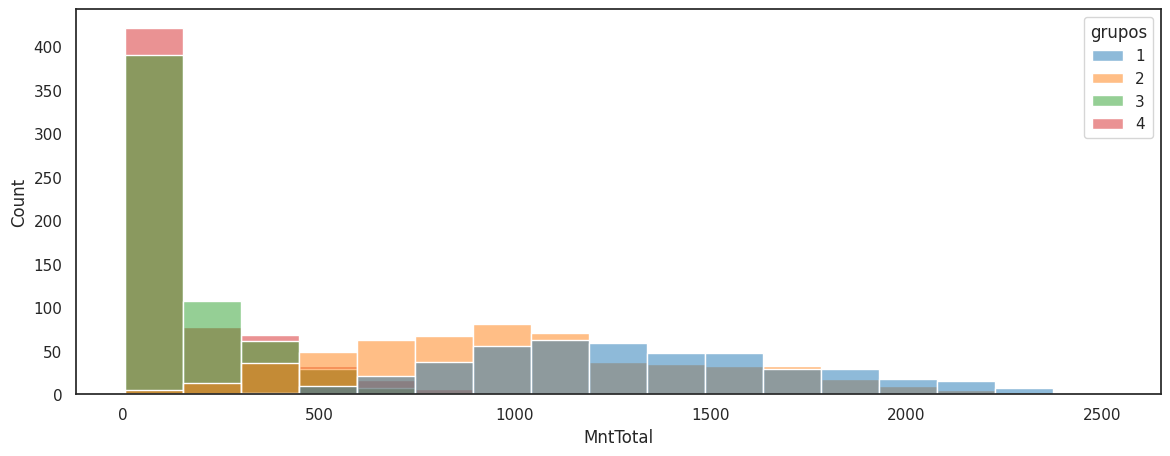

In [ ]:
# seu código
sns.histplot(data=filtro, x="MntTotal", hue="grupos", palette="tab10");

In [ ]:
# seu código

In [ ]:
# seu código

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

In [ ]:
df_scaled["grupos"]=grupos
df_scaled.head()

,Recency,Days_Registered,MntTotal,Income,grupos
0,0.310532,1.529129,1.675488,0.234063,1
1,-0.380509,-1.188411,-0.962358,-0.234559,4
2,-0.795134,-0.205155,0.280250,0.769478,2
3,-0.795134,-1.059945,-0.919224,-1.017239,4
4,1.554407,-0.951244,-0.307044,0.240221,3


In [ ]:
grupo1 = df_scaled[df_scaled["grupos"]==1]
grupo2 = df_scaled[df_scaled["grupos"]==2]
grupo3 = df_scaled[df_scaled["grupos"]==3]
grupo4 = df_scaled[df_scaled["grupos"]==4]

In [ ]:
grupo1

,Recency,Days_Registered,MntTotal,Income,grupos
0,0.310532,1.529129,1.675488,0.234063,1
15,-0.898791,1.128909,1.174463,1.213981,1
18,1.450751,0.516228,1.949227,0.983326,1
21,-0.242301,0.916447,1.862958,-1.978761,1
22,0.483293,0.985621,0.605418,0.252698,1
...,...,...,...,...,...
2203,1.347094,0.936211,0.401359,0.856654,1
2206,-1.106103,1.647712,0.895747,0.348338,1
2213,-0.242301,1.341371,1.373546,1.127242,1
2226,1.312542,0.535992,0.076190,0.458122,1


In [ ]:
grupo1.describe()

,Recency,Days_Registered,MntTotal,Income,grupos
count,439.000000,439.000000,439.000000,439.000000,439.0
mean,0.208293,0.961242,1.186957,0.705122,1.0
std,1.001487,0.479391,0.696509,0.479334,0.0
min,-1.658936,-0.387972,-0.341884,-1.978761,1.0
25%,-0.691478,0.605165,0.659337,0.391489,1.0
50%,0.414188,0.990562,1.126352,0.707135,1.0
75%,1.070678,1.388311,1.626547,1.055324,1.0
max,1.727167,1.702063,3.180222,2.004369,1.0


In [ ]:
grupo1_lista = ["O grupo 1 é composto por pessoas que têm um Income médio de 0.705122"]

In [ ]:
grupo2.describe()

,Recency,Days_Registered,MntTotal,Income,grupos
count,560.000000,560.000000,560.000000,560.000000,560.0
mean,-0.123220,-0.682648,0.694774,0.803909,2.0
std,0.923442,0.632029,0.781262,1.156071,0.0
min,-1.693488,-1.746741,-0.997198,-0.429296,2.0
25%,-0.898791,-1.198293,0.115592,0.407015,2.0
50%,-0.104093,-0.681960,0.612054,0.711108,2.0
75%,0.552397,-0.223684,1.192298,1.043026,2.0
max,1.727167,1.682299,3.181881,24.413282,2.0


In [ ]:
grupo2_lista = ["O grupo 2 é composto por pessoas que têm um Income médio de 0.803909"]

In [ ]:
grupo3.describe()

,Recency,Days_Registered,MntTotal,Income,grupos
count,595.000000,595.000000,595.000000,595.000000,595.0
mean,0.849719,0.131437,-0.755558,-0.622828,3.0
std,0.577990,0.964448,0.249741,0.518188,0.0
min,-0.691478,-1.731918,-0.998857,-2.007250,3.0
25%,0.448740,-0.639962,-0.934155,-1.005676,3.0
50%,0.932470,0.204946,-0.872771,-0.607463,3.0
75%,1.312542,0.936211,-0.642167,-0.253672,3.0
max,1.727167,1.707004,0.142551,0.840284,3.0


In [ ]:
grupo3_lista = ["O grupo 3 é composto por pessoas que têm um Income médio de -0.622828"]

In [ ]:
grupo4.describe()

,Recency,Days_Registered,MntTotal,Income,grupos
count,622.000000,622.000000,622.000000,622.000000,622.0
mean,-0.848907,-0.189562,-0.740500,-0.625651,4.0
std,0.562061,1.015422,0.299559,0.498462,0.0
min,-1.693488,-1.746741,-0.997198,-1.916140,4.0
25%,-1.313416,-1.136530,-0.937473,-0.964571,4.0
50%,-0.864239,-0.294093,-0.886043,-0.628661,4.0
75%,-0.415062,0.723749,-0.616867,-0.260665,4.0
max,0.656053,1.697122,0.686710,1.374348,4.0


In [ ]:
grupo4_lista = ["O grupo 3 é composto por pessoas que têm um Income médio de -0.625651"]

In [ ]:
dicio_grupos = {"grupo 1": grupo1_lista,
                "grupo2": grupo2_lista,
                "grupo3": grupo3_lista,
                "grupo4": grupo4_lista}

personas = pd.DataFrame(dicio_grupos)
personas

,grupo 1,grupo2,grupo3,grupo4
0,O grupo 1 é composto por pessoas que têm um In...,O grupo 2 é composto por pessoas que têm um In...,O grupo 3 é composto por pessoas que têm um In...,O grupo 3 é composto por pessoas que têm um In...


In [ ]:
personas = pd.DataFrame(dicio_grupos, index=["Income"])
personas

,grupo 1,grupo2,grupo3,grupo4
Income,O grupo 1 é composto por pessoas que têm um In...,O grupo 2 é composto por pessoas que têm um In...,O grupo 3 é composto por pessoas que têm um In...,O grupo 3 é composto por pessoas que têm um In...


Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

### Para refletir:


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding